In [16]:
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras
import numpy as np

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [12]:
'''
config = tf.compat.v1.ConfigProto() 
sess = tf.compat.v1.Session(config=config) 
tf.compat.v1.keras.backend.set_session(sess)
'''

'\nconfig = tf.compat.v1.ConfigProto() \nsess = tf.compat.v1.Session(config=config) \ntf.compat.v1.keras.backend.set_session(sess)\n'

In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9283305951571429927
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 9210949796
locality {
  bus_id: 1
  links {
  }
}
incarnation: 5066505987805457531
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


In [79]:
# keras load data :https://keras-cn.readthedocs.io/en/latest/preprocessing/image/

#補充 :https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

In [44]:
import tensorflow as tf
# 使用GPU 跑
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [5]:
datagen =ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        zca_epsilon=1e-06,  
        rotation_range=0, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0.,  
        channel_shift_range=0., 
        fill_mode='nearest',
        cval=0.,  
        horizontal_flip=True,
        vertical_flip=False, 
        rescale=1./255 ,
        preprocessing_function=None,
        data_format=None,
        #設置validation　在　load data的時候要設置subset='validation' 跟 raining
        validation_split=0.1)


In [6]:
train  = datagen.flow_from_directory('image_data/train/', target_size=(64,64) ,class_mode='categorical',subset= 'training', batch_size=64)

Found 2543 images belonging to 5 classes.


In [7]:
validation = datagen.flow_from_directory('image_data/train/', target_size=(64,64) ,class_mode='categorical',subset= 'validation')

Found 280 images belonging to 5 classes.


In [14]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=train[0][0][0].shape))

model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( 5)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [15]:
print("Total Parameters：%d" % model.count_params())

Total Parameters：6491173


In [18]:
model.compile( optimizer=keras.optimizers.RMSprop(lr=1e-4), loss = 'categorical_crossentropy' , metrics = ['accuracy'])
epoch = 150

In [19]:
model.fit_generator(train ,
                    #steps_per_epoch = train.samples,# batchsize ,設完跑太慢 就沒用了
                    validation_data = validation ,
                    #validation_steps = validation.samples,
                    epochs=epoch)
model.save('kai_model_layer1_32_dim.h5')

Epoch 1/150
40/40 [==============================] - 7s 174ms/step - loss: 1.3708 - accuracy: 0.3980 - val_loss: 1.1986 - val_accuracy: 0.4607
Epoch 2/150
40/40 [==============================] - 7s 167ms/step - loss: 1.2559 - accuracy: 0.4565 - val_loss: 1.2217 - val_accuracy: 0.5179
Epoch 3/150
40/40 [==============================] - 7s 173ms/step - loss: 1.2301 - accuracy: 0.4691 - val_loss: 1.1016 - val_accuracy: 0.5000
Epoch 4/150
40/40 [==============================] - 7s 171ms/step - loss: 1.1984 - accuracy: 0.4896 - val_loss: 1.2311 - val_accuracy: 0.5107
Epoch 5/150
40/40 [==============================] - 7s 169ms/step - loss: 1.1654 - accuracy: 0.5203 - val_loss: 0.9215 - val_accuracy: 0.5464
Epoch 6/150
40/40 [==============================] - 7s 173ms/step - loss: 1.1464 - accuracy: 0.5328 - val_loss: 1.1284 - val_accuracy: 0.5964
Epoch 7/150
40/40 [==============================] - 7s 181ms/step - loss: 1.1202 - accuracy: 0.5474 - val_loss: 0.8632 - val_accuracy: 0.6143

Epoch 58/150
40/40 [==============================] - 7s 177ms/step - loss: 0.7162 - accuracy: 0.7318 - val_loss: 0.4682 - val_accuracy: 0.7143
Epoch 59/150
40/40 [==============================] - 7s 167ms/step - loss: 0.7015 - accuracy: 0.7251 - val_loss: 0.6165 - val_accuracy: 0.7214
Epoch 60/150
40/40 [==============================] - 7s 168ms/step - loss: 0.7009 - accuracy: 0.7228 - val_loss: 1.0861 - val_accuracy: 0.7250
Epoch 61/150
40/40 [==============================] - 7s 176ms/step - loss: 0.6895 - accuracy: 0.7295 - val_loss: 0.4973 - val_accuracy: 0.7321
Epoch 62/150
40/40 [==============================] - 7s 179ms/step - loss: 0.6957 - accuracy: 0.7405 - val_loss: 0.6017 - val_accuracy: 0.7536
Epoch 63/150
40/40 [==============================] - 7s 169ms/step - loss: 0.6887 - accuracy: 0.7377 - val_loss: 0.4214 - val_accuracy: 0.7000
Epoch 64/150
40/40 [==============================] - 7s 173ms/step - loss: 0.6768 - accuracy: 0.7405 - val_loss: 0.9797 - val_accuracy:

Epoch 115/150
40/40 [==============================] - 7s 168ms/step - loss: 0.5196 - accuracy: 0.8042 - val_loss: 0.7146 - val_accuracy: 0.7393
Epoch 116/150
40/40 [==============================] - 7s 167ms/step - loss: 0.5272 - accuracy: 0.7939 - val_loss: 0.7630 - val_accuracy: 0.7500
Epoch 117/150
40/40 [==============================] - 7s 166ms/step - loss: 0.5106 - accuracy: 0.8085 - val_loss: 0.4760 - val_accuracy: 0.7857
Epoch 118/150
40/40 [==============================] - 7s 170ms/step - loss: 0.5088 - accuracy: 0.8101 - val_loss: 0.6087 - val_accuracy: 0.7571
Epoch 119/150
40/40 [==============================] - 7s 168ms/step - loss: 0.5256 - accuracy: 0.8042 - val_loss: 0.7888 - val_accuracy: 0.7536
Epoch 120/150
40/40 [==============================] - 7s 169ms/step - loss: 0.5194 - accuracy: 0.8112 - val_loss: 1.1413 - val_accuracy: 0.7214
Epoch 121/150
40/40 [==============================] - 7s 173ms/step - loss: 0.5107 - accuracy: 0.8081 - val_loss: 0.7096 - val_ac

In [ ]:
#loss: 0.5687 - accuracy: 0.7774 - val_loss: 0.7251 - val_accuracy: 0.7536
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

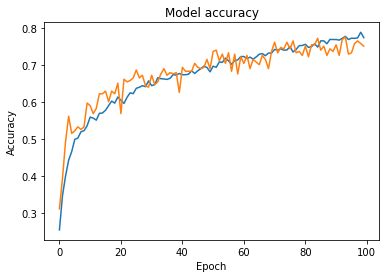

In [36]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [4]:
datagen_test =ImageDataGenerator(rescale=1./255)

test_generator = datagen_test.flow_from_directory(
        r'D:\百日\期中 and 期末\image_data\test',
        target_size=(64,64),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

Found 2000 images belonging to 1 classes.


In [2]:

model = keras.models.load_model('kai_model_layer1_32_dim.h5')

In [5]:
filenames = test_generator.filenames
pred  = model.predict_generator(test_generator ,len(filenames) )

In [17]:
pred

array([[1.5230544e-03, 1.4569778e-03, 9.6332103e-01, 1.8319772e-05,
        3.3680554e-02],
       [1.9461079e-01, 6.0720330e-01, 1.3766488e-01, 4.8984759e-02,
        1.1536322e-02],
       [7.7858934e-04, 9.8747190e-04, 6.3374108e-01, 1.6458211e-02,
        3.4803462e-01],
       ...,
       [9.9998999e-01, 7.1179788e-06, 2.3553666e-06, 7.2820598e-08,
        4.4354815e-07],
       [1.2296077e-06, 1.2170836e-04, 3.8807768e-05, 9.9976808e-01,
        7.0040631e-05],
       [5.8461381e-03, 3.1730779e-03, 2.5571454e-01, 2.0906045e-03,
        7.3317564e-01]], dtype=float32)

In [18]:
result = np.argmax(pred,axis=1)

In [23]:
filenames

['unknow\\0028624c49b3e0610ff9f1d111f5d532.jpg',
 'unknow\\002c30700185b7971369258b438070d5.jpg',
 'unknow\\00852f4f666acecd0c0d140365b42efd.jpg',
 'unknow\\00c08828fce04e360c732cac01edad9e.jpg',
 'unknow\\00d366e7877b6a78b104b57d67b60e6b.jpg',
 'unknow\\00e803f7bc6d21b6d6d3a98136ea4635.jpg',
 'unknow\\00e9cb1dca407810856e77b31309d5ab.jpg',
 'unknow\\014d33090eb706769ff782d8c500dc2a.jpg',
 'unknow\\015c8f0e6b95baf9dcbb34647624c5b8.jpg',
 'unknow\\0194948a29f0e891c54f88004fb4c51c.jpg',
 'unknow\\01964126d7cc3122173ce68761cc23bd.jpg',
 'unknow\\0279619774b01b44b05b33bff44b541f.jpg',
 'unknow\\027f28c9c4e255b22a8e0026cd5868b3.jpg',
 'unknow\\0290c31cfc41f2dc51dcaff0dbda2da5.jpg',
 'unknow\\02b5b88e51b7abd559bfb95138f33b95.jpg',
 'unknow\\02b703e9b535936aa0e00886fc4669c3.jpg',
 'unknow\\033925568a8d3170e7d7710483e3fae6.jpg',
 'unknow\\034d01c095f88f0bcde09c3bb96682cd.jpg',
 'unknow\\0370dc76bacae16e2e447b6a7549f3df.jpg',
 'unknow\\03763fddc1b3b7e5751cc65398f28bf8.jpg',
 'unknow\\03d2eb71b6

In [19]:
allfilename= list()
for i in filenames:
    allfilename.append(i[7:-4])

In [36]:
pd_result = pd.DataFrame(result ,columns = ['flower_class'])

In [37]:
pd_filename = pd.DataFrame(allfilename,columns = ['id'])

In [38]:
ans = pd.concat([pd_filename,pd_result],axis=1)

In [39]:
ans.to_csv('allans.csv',index=0)